# Credit Card Fraud Detection Project

## I.Project Setup

### I.A) Import of basic needed libraries

In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

print("Packages imported successfully")

Packages imported successfully


### I.B) Import of the data from the CSV file

In [93]:
df = pd.read_csv("./creditcard.csv")

In [94]:
df.shape

(284807, 31)

In [95]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We see that we have an time stamp, a bunch of variables that seem to have also negative values, an amount variable and also the class which refers to the nature of the transaction (1 for Fraud and 0 for Not Fraud)

After looking into the description of the data in the Kaggle website, i saw that the V variables are the results of a PCA transformations

## II.Data cleaning

### II.A) Null values

In [96]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

This dataset doesn't have any null values

### II.B) Duplicate values

In [97]:
print("number of rows before dropping duplicates :",df.shape[0])
df = df.drop_duplicates()
print("number of rows after dropping duplicates :", df.shape[0])

number of rows before dropping dublicates : 284807
number of rows after dropping dublicates : 283726


This dataset doesn't contain any duplicates

### II.C) Data Formatting

In [98]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

The data are well formated, no need to change any types

## III.Exploratory Data Analysis

Let's take a further look into the dataframe

In [99]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Let's look at the Time and Amount variables more precisely

In [100]:
df.describe()["Time"]

count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64

In [101]:
df.describe()["Amount"]

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

We can see that the min Time is 0 so there is no unusal values. For the Amount values, we can see that the mean amount is 88,35 euros but we have a max of 25691,16 euros. So we may assume that we have some extremes values.

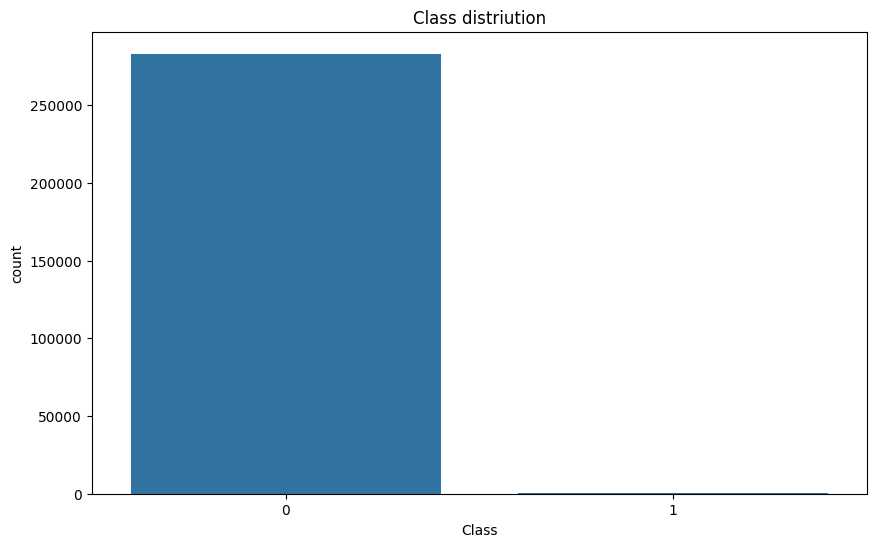

In [102]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Class")
plt.title("Class distriution");

We can see that the dataset is highly imbalanced.

In [103]:
print(df["Class"].value_counts(),"\n")
percentage_notfraud = df["Class"].value_counts()[0]*100 / df.shape[0]
print("Percentage of legit transactions : ",percentage_notfraud,"%")

Class
0    283253
1       473
Name: count, dtype: int64 

Percentage of legit transactions :  99.83328986416473 %


We will have to balance our data in order to have better performing algorithms in order to not have model biased towards non fraudulent class and improved fradulous transactions detection models.

Let's see now the distribution of our variables.

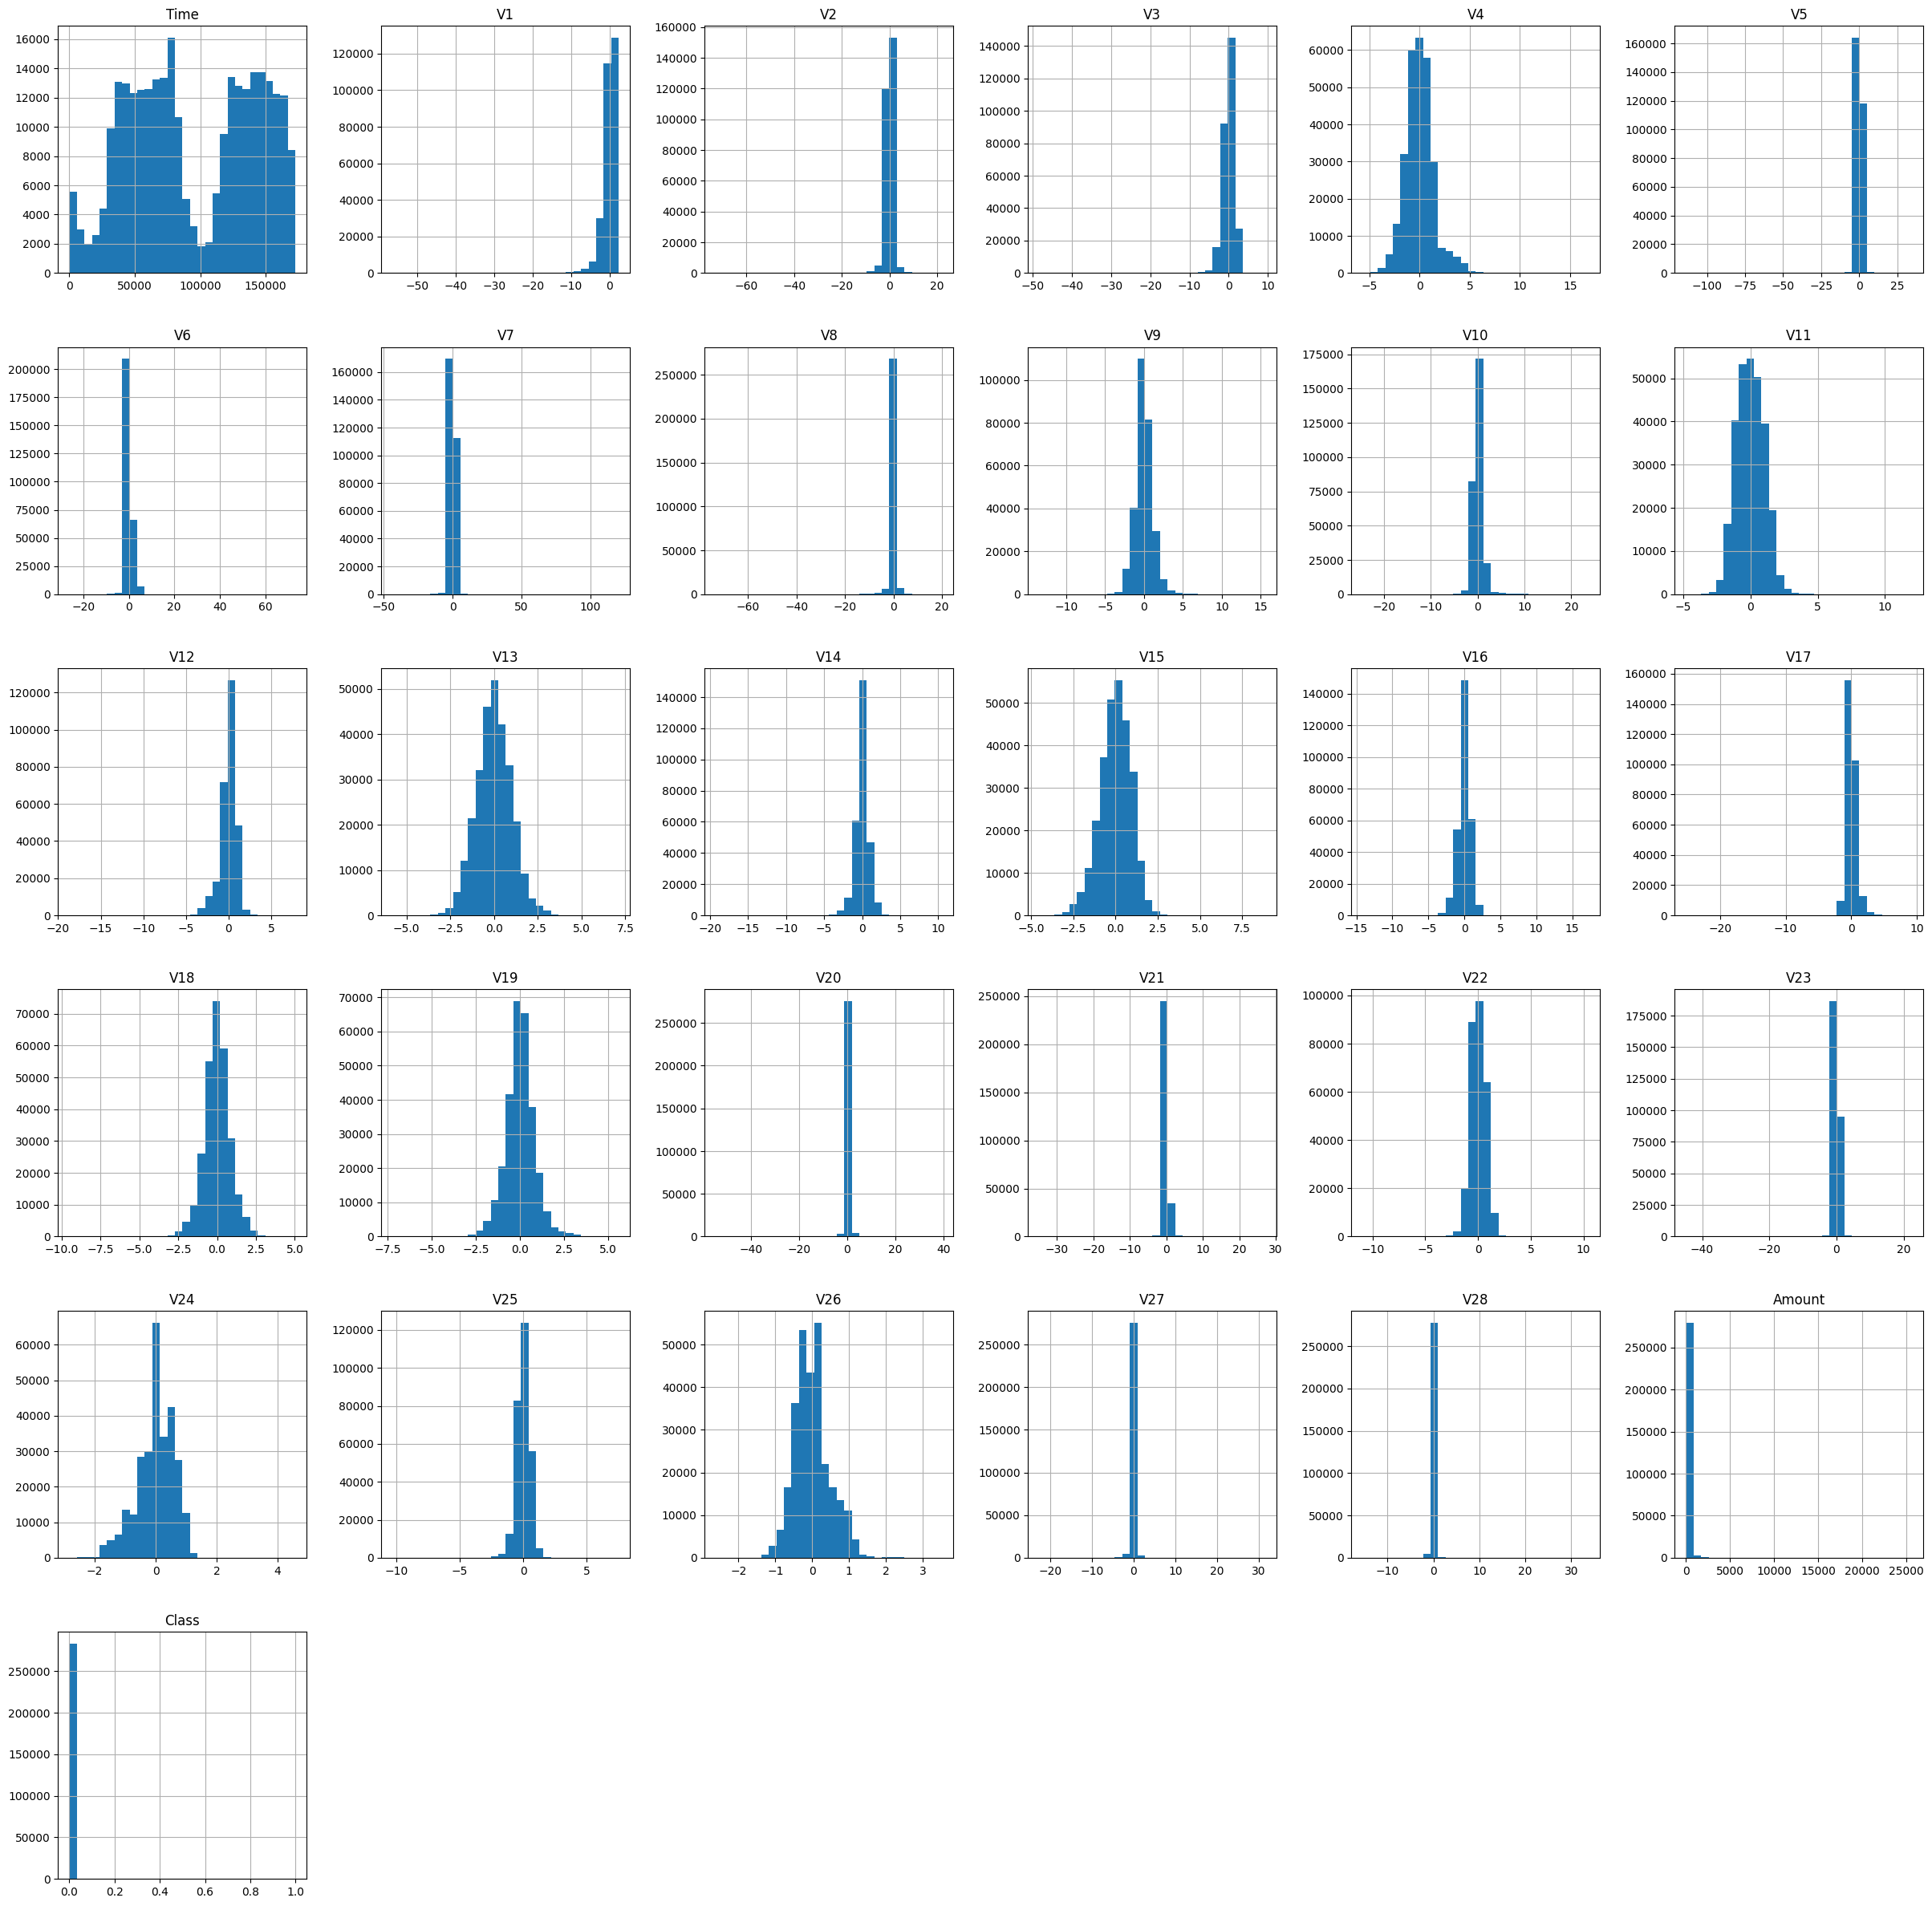

In [104]:
df.hist(bins=30, figsize=(30,30));

And now the correlation of our features

<Axes: >

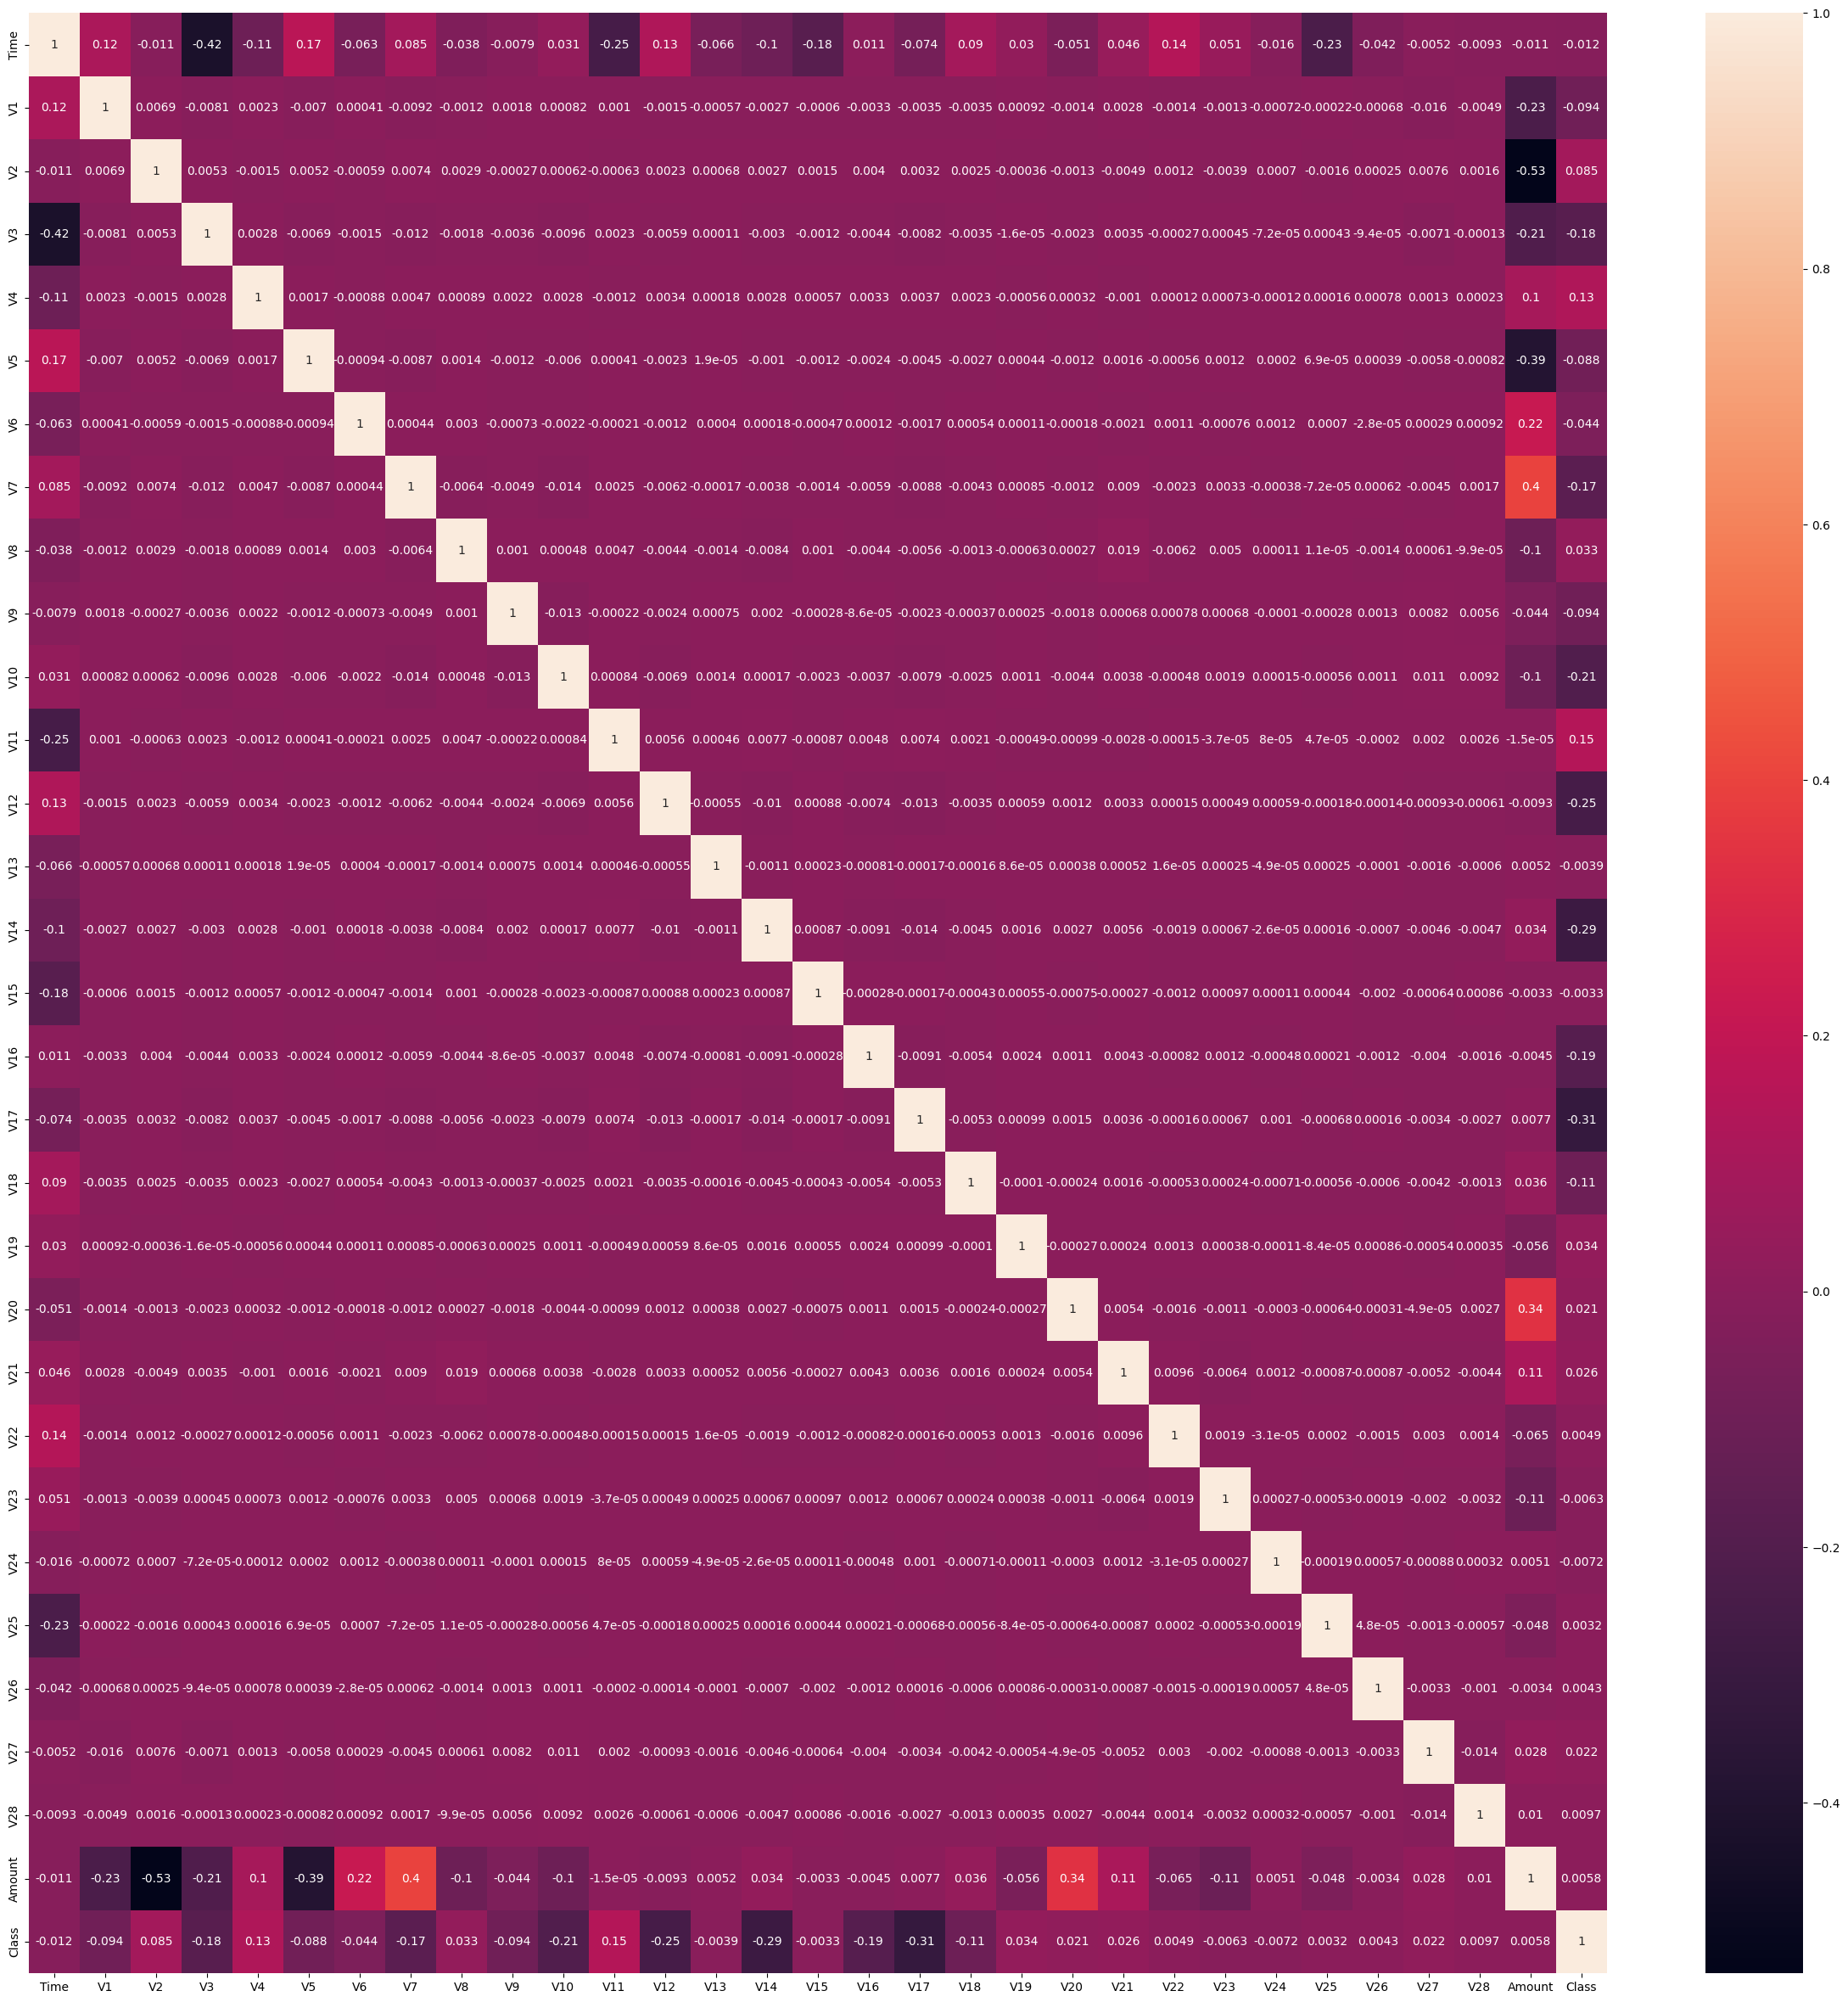

In [105]:
corr_matrix = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(data=corr_matrix, annot=True)

We can see that the V17 and V14 seems to be slightly negative correlated with the Class. Let's verify that.

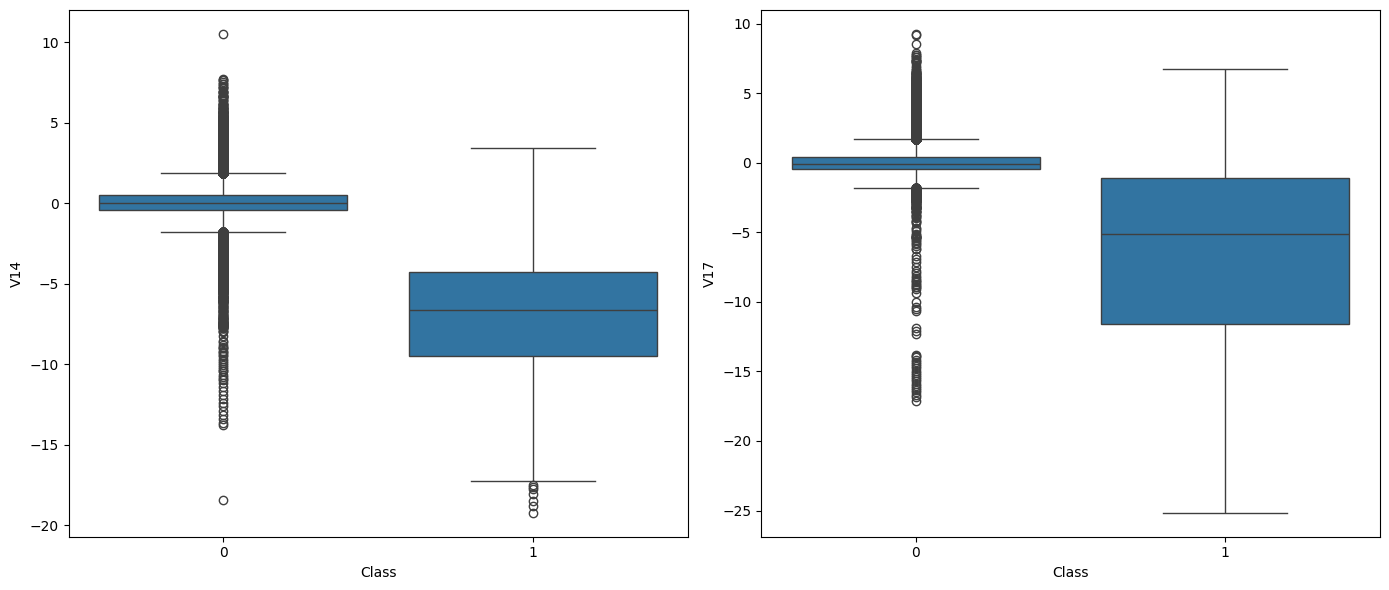

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data = df, x = "Class", y="V14", ax = axes[0])
sns.boxplot(data=df, x="Class", y="V17", ax=axes[1])
plt.tight_layout()
plt.show()

We can see in fact that in fact, the distribution of V14 and V17 for legit transaction are tightly clustered around 0 whereas for frauduloius ones, they are widely distributed but around a lower median. Additionally, we can see that there are a lot of outliers for the class 1.

## IV.Logistic Regression Modeling

When it comes to classification, the simpliest algorithm is the logistic regression.

### IV.A) Data Preprocessing

Let's split our data into a train part with which our models will be trained and a test part with which we will evaluate them. This reduces the overfitting of our model and allows us to see if it can detect various fradulous transactions. Before to do so, we scale our data to optimize our model. Scaled data reduces the weight of features with larger ranges, and allow our model to find the optimal solution with a fewer iterations needed. We will use the RobustScaler as it deals better with the outliers.

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

X = df.drop(columns="Class", axis=1)
y = df["Class"]


scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


### IV.B) Logistic Regression

#### IV.B.1) Model Training

In [108]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

logReg.fit(X = X_train, y = y_train)

LogisticRegression()

In [109]:
y_pred = logReg.predict(X_test)

#### IV.B.2) Model Evaluation

In [110]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy score",accuracy)

Accuracy score 0.9991541254009093


Problem : Even if the accuracy score seems to be very high, we can't tell if our model is precise. In fact, as our dataset is highly unbalanced, we need to predict correctly the 0,1% of fraudulent transactions. In order to evaluate our model we will prioritize other metrics.

Strategy : In the credit card fraud detection, our main focus is to avoid fraudulent transactions to be labelled as legit ones. Also, we don't want to flag to many legit transactions as fraudulent. That's why, evaluate our models, we will use the f2 score metric as it prioritizes the ability of the model to minimize false negatives but by also, taking into account the false positives. We will also take a look at the confusion matrix to have a better visualization of the performance of our models.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.53      0.67        90

    accuracy                           1.00     56746
   macro avg       0.94      0.77      0.83     56746
weighted avg       1.00      1.00      1.00     56746

F2 score : 0.5797101449275363


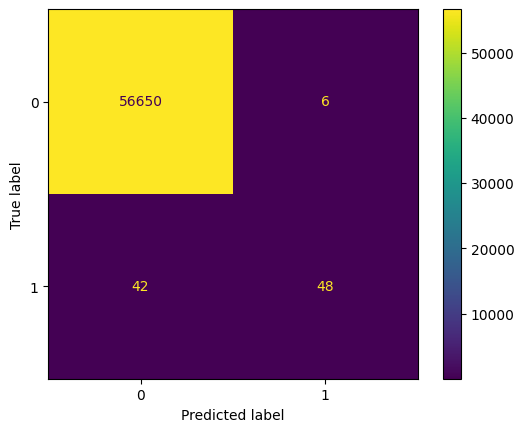

In [111]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

print(classification_report(y_test, y_pred))

f2 = fbeta_score(y_test, y_pred, beta=2)
print("F2 score :", f2);

Diving more deeply into our evaluation, we can see that our model has low scores for the fraudulent transactions. Almost half of them are labelled as legit. The reason is that we have an unbalanced dataset. So we might consider using some sampling methods or some algorithms that can deal with unbalanced datasets.

## V.Model Improvement

Problem : As our dataset is highly unbalanced, our model does not predict well the fradulent transactions and tends to label the transactions as non fraudulent. To improve our prediction we have to balance our dataset in order to have an equal amount of fraudulent and legit transactions.

Strategy : In this dataset, the minority is the fraudulent class. We must use a sampling method to balance the data. 
We have many options including :

<ul>
<li>Random undersampling : randomly drops legit transactions. We will not use this technique as this will lead to a big loss of data.</li>
<br>
<li>Random oversampling : randomly duplicates fraudulent transactions. This technique leads to many duplicates which can cause an overfitting of the model. The model memorizes the duplicated samples instead of learning to classify the new data. Moreover, this method does not add new information to the model.</li>
<br>
<li>SMOTE : generates new transactions that resemble the fraudulent ones without being identical. It randomly selects an individual, then randomly picks one of its closest neighbors, and creates a new individual between these two.</li>
</ul>

Considering these three options the better one seems to be the SMOTE algorithm as it avoids overfitting without having a big loss of data. 



### V.A) Synthetic Oversampling : SMOTE algorithm

As SMOTE relies on distances between neighbors to generate synthetic samples, it important to scale our data before applying SMOTE. However, as we already applied the Robust Scaler on our X_test earlier, we directly generate synthetic samples. 

Class
0    226597
1    226597
Name: count, dtype: int64


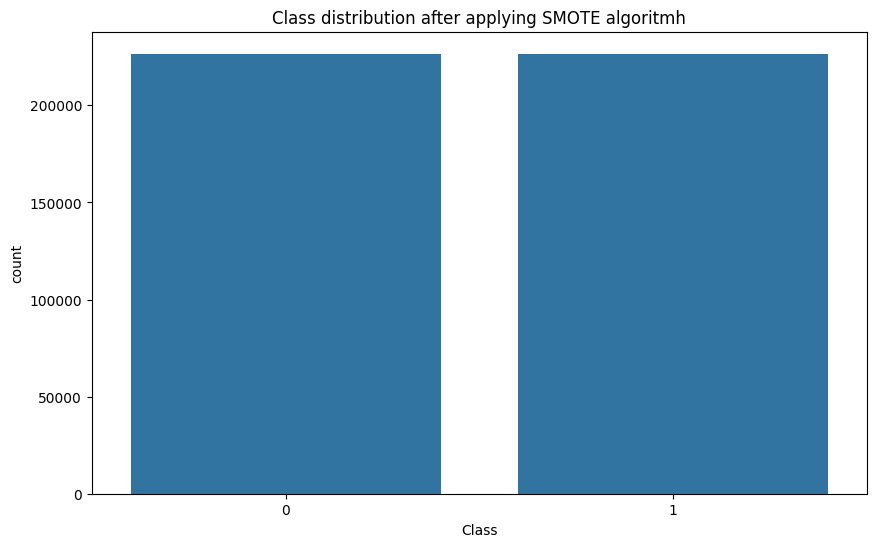

In [112]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

print(y_train_smote.value_counts())

plt.figure(figsize=(10,6))
sns.countplot(x=y_train_smote)
plt.title("Class distribution after applying SMOTE algoritmh");

Now that our dataset is balanced, we can perform our algorithms with a better fraudulent transactions detection.

## VI. Logistic Regression (with balanced train set)

### VI.A) Non-optimized Logistic Regression

In [113]:
logReg = LogisticRegression()

logReg.fit(X = X_train_smote, y = y_train_smote)

LogisticRegression()

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.06      0.90      0.10        90

    accuracy                           0.98     56746
   macro avg       0.53      0.94      0.55     56746
weighted avg       1.00      0.98      0.99     56746

F2 score for non optimal logistic regression model : 0.2215536105032823


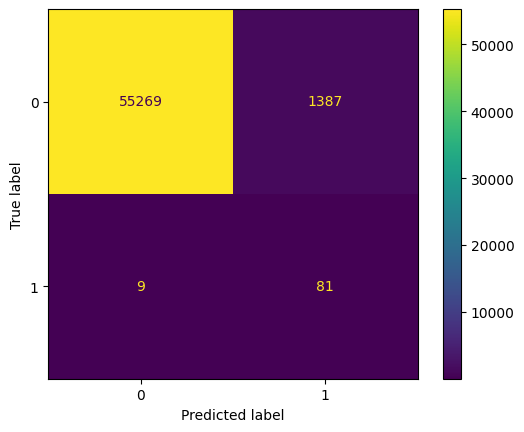

In [114]:
y_pred = logReg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
print(classification_report(y_test, y_pred))
print(
    "F2 score for non optimal logistic regression model :",
    fbeta_score(y_test, y_pred, beta=2),
)

Problem : Here, we see that our model finds more fraudulent transactions but it also flags too much transactions as fraud. 

Strategy : We can try to use another model but let's first try to change the threshold of the logistic regression.

### VI.B) Optimized Logistic Regression

In [115]:
#create our array of thresholds from 0 to 1
thresholds = np.arange(0.0, 1.1, 0.1)

#create the array containing the score of each threshold
scores = []

#probabilites calculated by the model
y_proba = logReg.predict_proba(X_test)[:, 1]

for threshold in thresholds:
    #classify according to the threshold
    y_pred = np.where(y_proba >= threshold, 1, 0)

    #calculate the f2 score and put it in the scores array
    f2 = fbeta_score(y_test, y_pred, beta=2)
    scores.append(f2)

#find the best threshold
best_threshold_idx = np.argmax(scores)
best_threshold = thresholds[best_threshold_idx]
print("Optimal threshold :",best_threshold)


Optimal threshold : 0.9


Here, our model will class the transactions with a predicted probabilty lower than 0.9 as fradulous as non-fradudulous and the others as fraudulent.

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56656
           1       0.17      0.82      0.29        90

    accuracy                           0.99     56746
   macro avg       0.59      0.91      0.64     56746
weighted avg       1.00      0.99      1.00     56746

F2 score for optimal logistic regression model : 0.4725415070242657


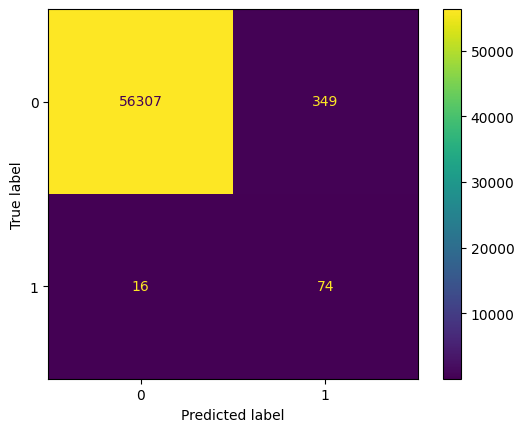

In [116]:
# create the confusion matrix and the classification report for the optimal threshold and print the F2 score

y_pred = np.where(y_proba >= best_threshold, 1, 0)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
print(classification_report(y_test, y_pred))
print("F2 score for optimal logistic regression model :",fbeta_score(y_test, y_pred, beta=2))

Result : We can see finally that our logistic regression model performs better after balancing the dataset and optimizing the threshold of our model leading to an increase of our recall of almost 20% while keeping the best false-negative percentage possible.

## VII.Random Forest Modeling

Problem : We can see that the F2 score for the optimal logistic regression is still not high enough to be called efficient. 

Strategy : We can try with another model like the Random Forest which captures non-linear relationships between features and detect anommalous transactions by isolating unusual patterns.

### VII.A) Random Forest with 100 trees

#### VII.A.1) Model Training

In [117]:
from sklearn.ensemble import RandomForestClassifier

rfModel = RandomForestClassifier(n_estimators=100, random_state=42)

rfModel.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

### VII.A.2) Model Evaluation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.92      0.79      0.85        90

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746

F2 score for random forest with 100 trees : 0.8123569794050344


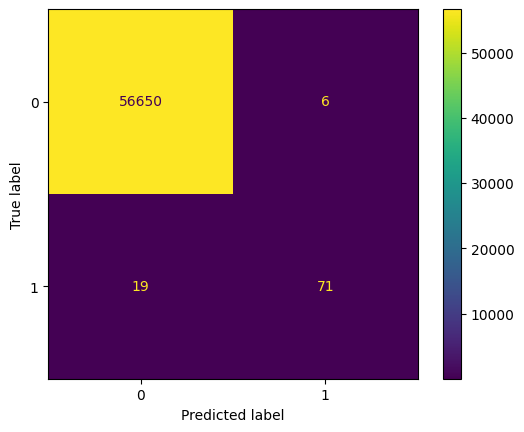

In [118]:
y_pred = rfModel.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
print(classification_report(y_test, y_pred))
print(
    "F2 score for random forest with 100 trees :",
    fbeta_score(y_test, y_pred, beta=2),
)

### VII.B) Random Forest with 200 trees

Let's improve the number of trees.

In [119]:
rfModel = RandomForestClassifier(
    n_estimators=200, random_state=42)

rfModel.fit(X_train_smote, y_train_smote)

RandomForestClassifier(n_estimators=200, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.92      0.79      0.85        90

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746

F2 score for random forest with 200 trees : 0.8123569794050344


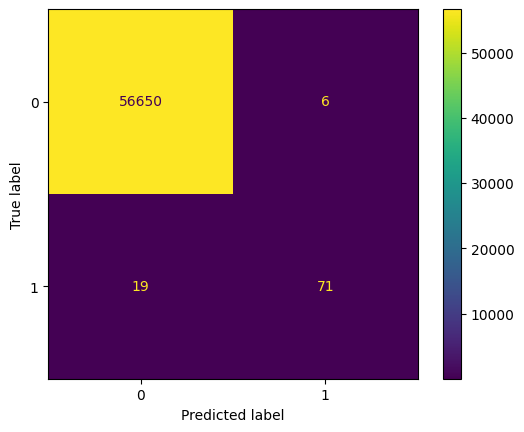

In [120]:
y_pred = rfModel.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
print(classification_report(y_test, y_pred))
print(
    "F2 score for random forest with 200 trees :",
    fbeta_score(y_test, y_pred, beta=2),
)

Result : We can see that the random forest performs better with a way better F2 score than the logistic regression. However, increasing the number of trees does not seem to increase meaningfully the performance of our model.

Remark : We can now try to see which features influences the most the transcation classification in our random forest model.

### VII.C) Analysis of our Random Forest Model

   Feature  Importance
14     V14    0.186103
10     V10    0.119492
4       V4    0.105956
12     V12    0.098600
17     V17    0.082987


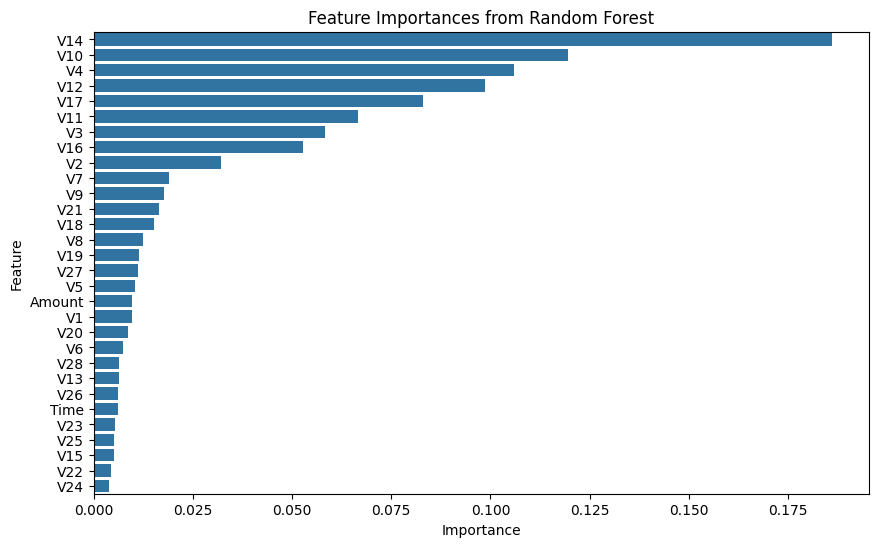

In [121]:
feature_importances = rfModel.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame(
    {"Feature": feature_names, "Importance": feature_importances}
)
importance_df = importance_df.sort_values(by="Importance", ascending=False)

print(importance_df.head())

plt.figure(figsize=(10,6))
sns.barplot(y="Feature", x="Importance", data = importance_df)
plt.title("Feature Importances from Random Forest");

Observation : As we have seen previously, the V14 variable is the most correlated with the class of our transactions with an importance score on our model of almost 0.19. 

It would be interesting to see which original variables influence on the V14 component but the source of the dataset does not provide further more information.